# 수치 미분
## 미분
$$ \frac{df(x)}{dx} = \lim_{a\to0} \frac{f(x+h) - f(x)}{h}$$

In [ ]:
# 나쁜 구현의 예
def numerical_diff(f,x):
    h = 1e-50
    return (f(x+h) - f(x)) / h

위의 구현에서는 h에 가급적 작은 값을 대입하고 싶었기에 1e-50 이라는 작은 값을 이용 했다.
그러나 이 방식은 반올림 오차 문제를 일으킨다. 반올림 오차는 작은 값이 생략되어 최종 계산 결과에 오차가 생기게 한다.


In [1]:
import numpy as np
np.float32(1e-50)

0.0

위와 같이 1e-50 을 float32로 나타내면 0.0이 되어, 올바르게 표현할수 없다.
미세한 값을 1e-50 에서 $10^{-4}$ 정도의 값을 사용하면 좋은 결과를 얻는다고 알려져 있다.

두번째 개선점으로는 함수 f의 차분과 관련한 것이다.
앞의 구현에서는 x + h와 x사이의 함수 f의 차분을 계산하고 있지만, 애당초 이 계산에는 오차가 있다는 사실에 주의 해야한다.
진정한 미분은 x위치의 함수의 기울기(이를 접선이라고 함)에 해당하지만, 이번 구현에서의 미분은 (x+h)와 x사이의 기울기에 해당한다.
이차이는 h를 무한히 0으로 좁히는 것이 불가능해 생기는 한계이다.
![nn](../images/chap4/numerical_differentiation_graph.png)

위의 그림과 같이 수치 미분에는 오차가 포함된다. 이 오차를 줄이기 위해 (x+h)와 (x-h)일 때의 함수 f의 차분을 계산하는 방법을 쓰기도 한다.
이 차분은 x를 중심으로 그 전후의 차분을 계산한다는 의미에서 **중심 차분** 혹은 **중앙 차분**이라고 한다.

$$ f'(x) = \lim_{h \to 0} \frac{f(x+h) - f(x - h)}{2h} $$

In [10]:
# 두 개선점을 적용한 수치 미분 구현
def numerical_diff(f,x):
    h = 1e-4
    return (f(x+h) - f(x-h)) / (2 * h)

### 수치 미분의 예
앞 절의 수치 미분을 사용하여 간단한 함수를 미분해보자. 우선 다음과 같은 2차 함수이다.
$$ y = 0.01x^2 + 0.1x $$

In [32]:
def function_1(x):
    return 0.01 * x ** 2 + 0.1 * x

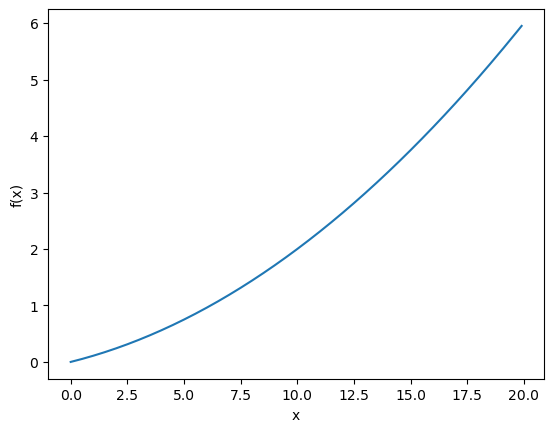

In [33]:
import numpy as np
import matplotlib.pylab as plt

x = np.arange(0.0,20.0,0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x,y)
plt.show()


0.1999999999990898
0.2999999999986347


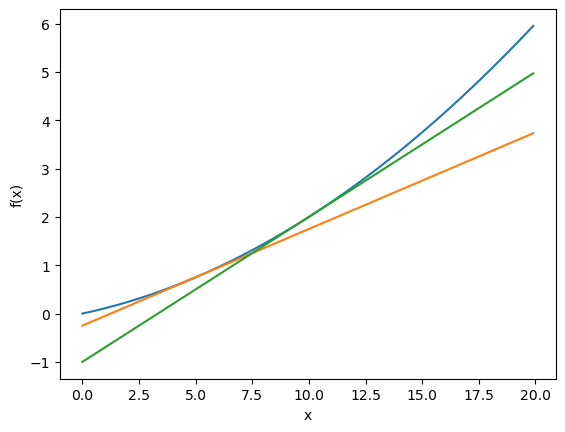

In [45]:
def tangent_line(f, x):
    d = numerical_diff(f, x)
    print(d)
    y = f(x) - d * x
    return lambda t: d*t + y

plt.xlabel("x")
plt.ylabel("f(x)")
x = np.arange(0.0,20.0,0.1)
y = function_1(x)
plt.plot(x,y)

tf = tangent_line(function_1, 5)
y2 = tf(x)
plt.plot(x,y2)

tf = tangent_line(function_1, 10)
y3 = tf(x)
plt.plot(x,y3)
plt.show()

### 편미분
다음 함수를 살펴보자. 인수들의 제곱 합을 계산하는 단순한 식이지만, 앞의 예와 달리 변수가 2개라는 점에 주의해야한다.
$$ f(x_0 , x_1) = x_0^2 + x_1 ^2$$

In [ ]:
def function_2(x):
    return x[0] ** 2 + x[1] ** 2

변수가 여럿인 함수에 대한 미분을 편미분이라고 한다.
이 편미분을 수식으로는 $\frac{\partial f}{\partial x_0} $ 나  $ \frac{\partial f}{\partial x_1} $ 처럼 쓴다.

##### 문제 1: $x_0 = 3, x_1 =4 $ 일 때,$x_0$에 대한 편미분 $\frac{\partial f}{\partial x_0} $ 을 구하라.

In [46]:
def function_tmp1(x0):
    return (x0 ** 2) + (4.0 ** 2.0) # x_1의 값을 하드코딩하여 제곱함.

numerical_diff(function_tmp1,3.0)

6.00000000000378

##### 문제 2 : $ x_0 = 3, x_1 = 4$ 일때, $x_1에 대한 편미분 \frac{\partial f}{partial x_1}$ 를 구하라.

In [47]:
def function_tmp2(x_1):
    return (x_1 ** 2) + (3.0 ** 2)

numerical_diff(function_tmp2,4)

7.999999999999119